#TITLE: To determine the most effective model for accurately predicting heart disease outcomes based on the heart dataset.

**MEMBERS**

*   Vruksheeka Deshmukh
*   Sanika Shrivastava
*   Yagya Solanki
*   Siddhi Mulewar



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree
import time


##DATA PREPROCESSING

In [ ]:
# Importing the dataset
df = pd.read_csv("/content/heart1 (1).csv")
df

,Id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,52,M,0,125,212,0,1,168,0,1.0,2,2,3,No
1,2,53,M,0,140,203,1,0,155,1,3.1,0,0,3,No
2,3,70,M,0,145,174,0,1,125,1,2.6,0,0,3,No
3,4,61,M,0,148,203,0,1,161,0,0.0,2,1,3,No
4,5,62,F,0,138,294,1,1,106,0,1.9,1,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,59,M,1,140,221,0,1,164,1,0.0,2,0,2,Yes
1021,1022,60,M,0,125,258,0,0,141,1,2.8,1,1,3,No
1022,1023,47,M,0,110,275,0,0,118,1,1.0,1,1,2,No
1023,1024,50,F,0,110,254,0,0,159,0,0.0,2,0,2,Yes


In [ ]:
df.head()
''' trestbps= resting blood pressure
    chol= cholestrol
    fbs= fasting blood pressure
    restecg= resting electrocardiographic
    thalach= maximum heart rate
    exang= exercise induced angina
    oldpeak= ST depression
    slope= slope peak exercise ST
    Ca= number of major vessels
    thal= thalassemia
    '''

' trestbps= resting blood pressure\n    chol= cholestrol\n    fbs= fasting blood pressure\n    restecg= resting electrocardiographic\n    thalach= maximum heart rate\n    exang= exercise induced angina\n    oldpeak= ST depression\n    slope= slope peak exercise ST\n    Ca= number of major vessels\n    thal= thalassemia\n    '

In [ ]:
# Drop the 'Id' column
df.drop(columns=['Id'], inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,M,0,125,212,0,1,168,0,1.0,2,2,3,No
1,53,M,0,140,203,1,0,155,1,3.1,0,0,3,No
2,70,M,0,145,174,0,1,125,1,2.6,0,0,3,No
3,61,M,0,148,203,0,1,161,0,0.0,2,1,3,No
4,62,F,0,138,294,1,1,106,0,1.9,1,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,M,1,140,221,0,1,164,1,0.0,2,0,2,Yes
1021,60,M,0,125,258,0,0,141,1,2.8,1,1,3,No
1022,47,M,0,110,275,0,0,118,1,1.0,1,1,2,No
1023,50,F,0,110,254,0,0,159,0,0.0,2,0,2,Yes


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,M,0,125,212,0,1,168,0,1.0,2,2,3,No
1,53,M,0,140,203,1,0,155,1,3.1,0,0,3,No
2,70,M,0,145,174,0,1,125,1,2.6,0,0,3,No
3,61,M,0,148,203,0,1,161,0,0.0,2,1,3,No
4,62,F,0,138,294,1,1,106,0,1.9,1,3,2,No


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,M,1,140,221,0,1,164,1,0.0,2,0,2,Yes
1021,60,M,0,125,258,0,0,141,1,2.8,1,1,3,No
1022,47,M,0,110,275,0,0,118,1,1.0,1,1,2,No
1023,50,F,0,110,254,0,0,159,0,0.0,2,0,2,Yes
1024,54,M,0,120,188,0,1,113,0,1.4,1,1,3,No


In [ ]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   object 
dtypes: float64(1), int64(11), object(2)
memory usage: 112.2+ KB


In [ ]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
df.shape

(1025, 14)

In [ ]:
df['age'].max()

77

In [ ]:
df['age'].min()

29

**DATA VISUALIZATION**

<Axes: xlabel='sex', ylabel='age'>

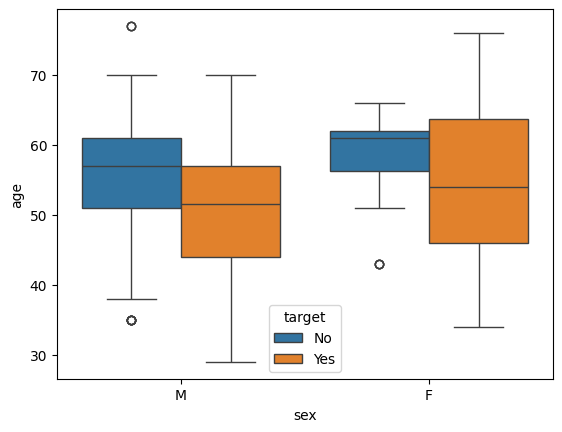

In [ ]:
import seaborn as sns
sns.boxplot(data=df,x = 'sex', y = 'age', hue='target')

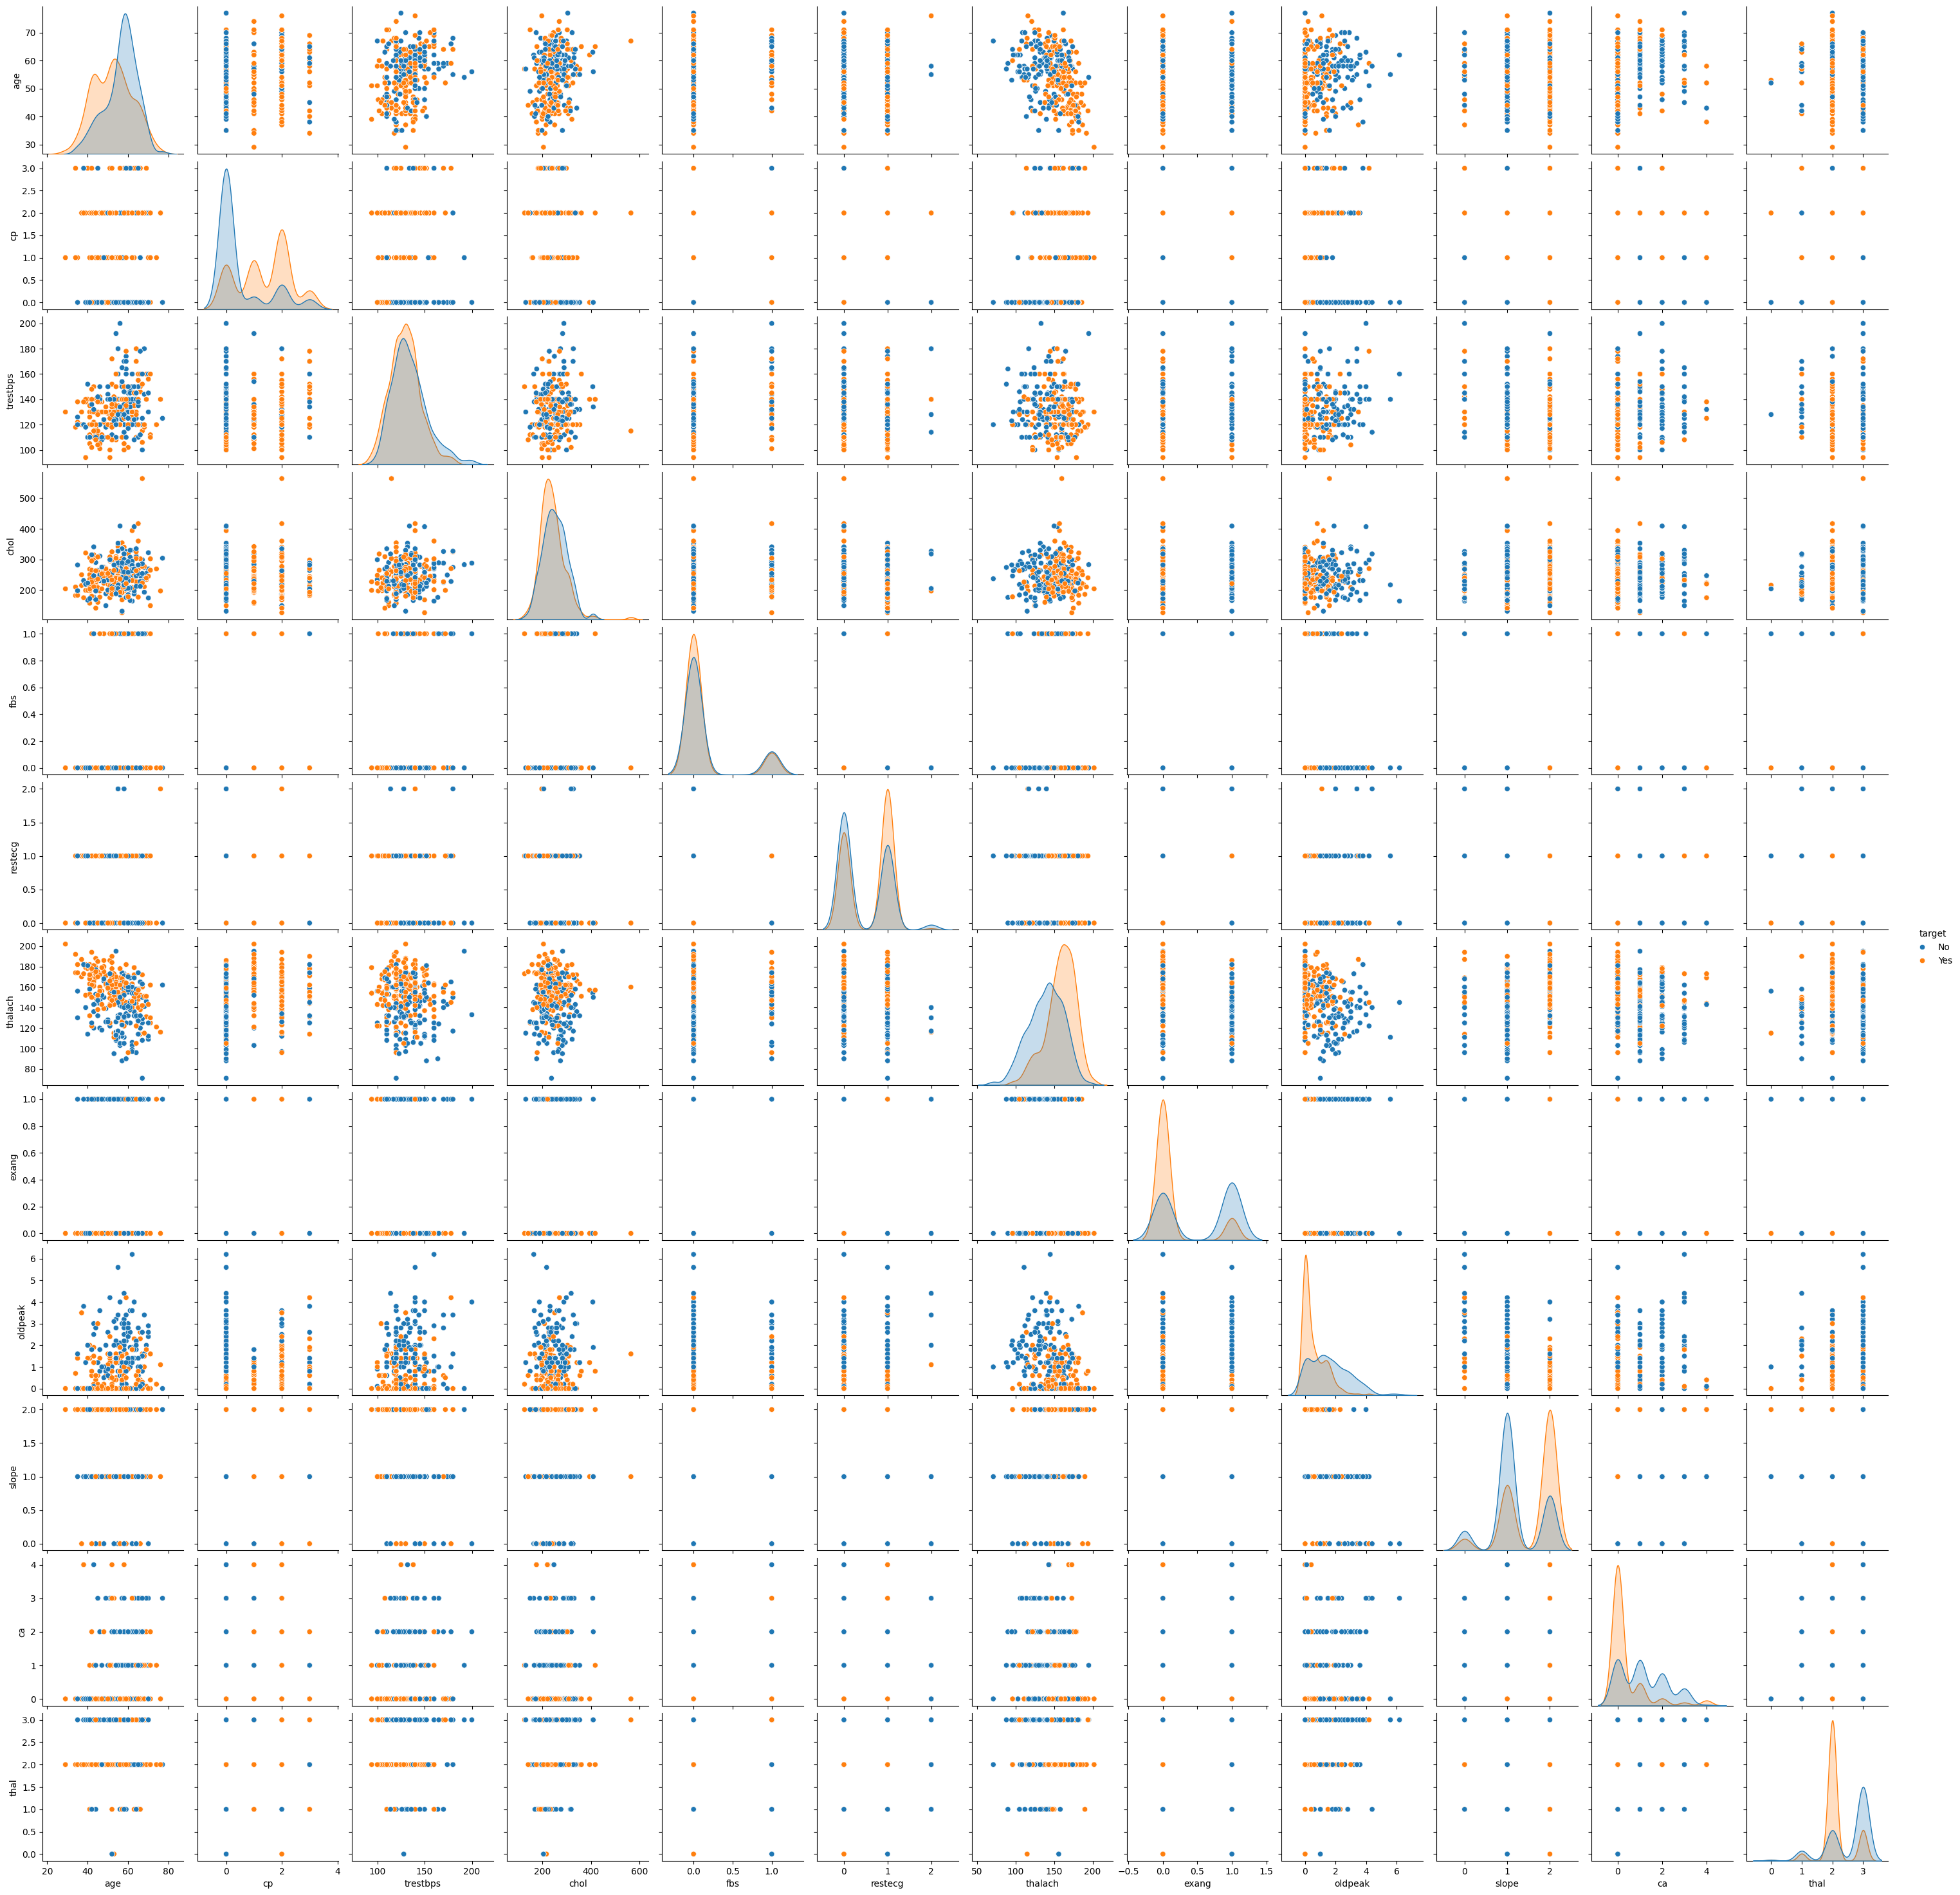

In [ ]:
sns.pairplot(df,hue='target')

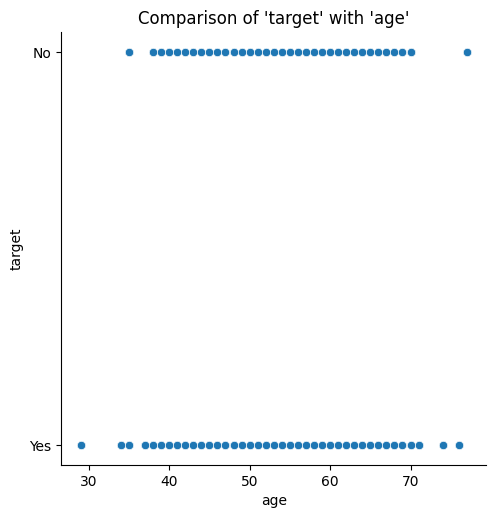

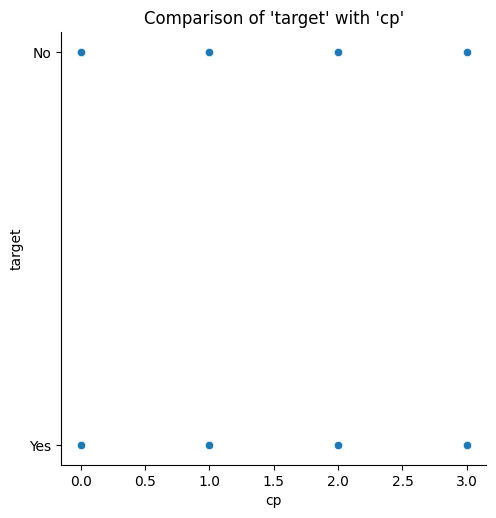

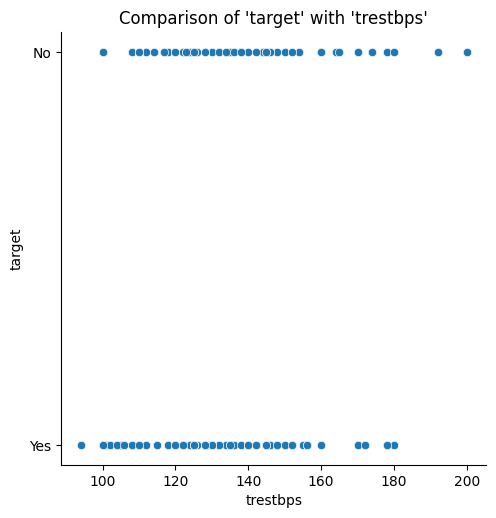

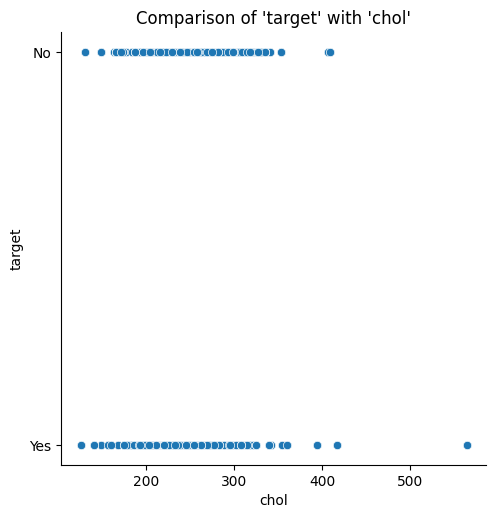

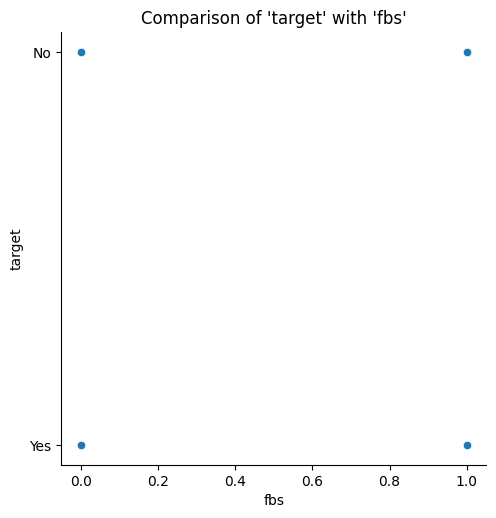

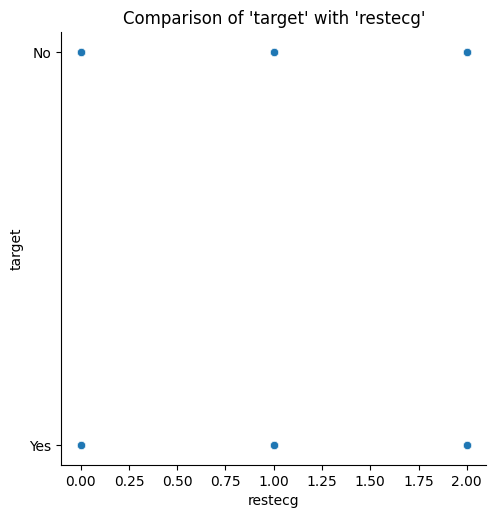

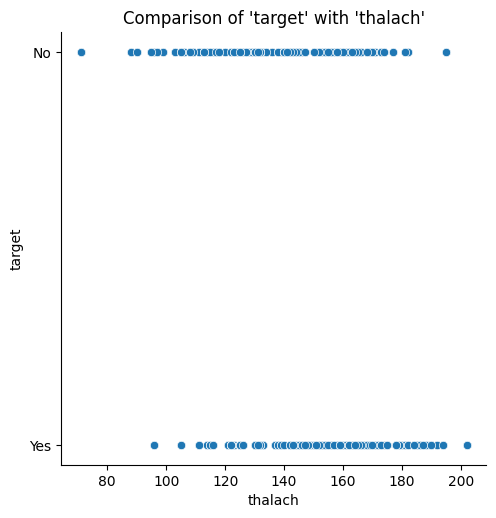

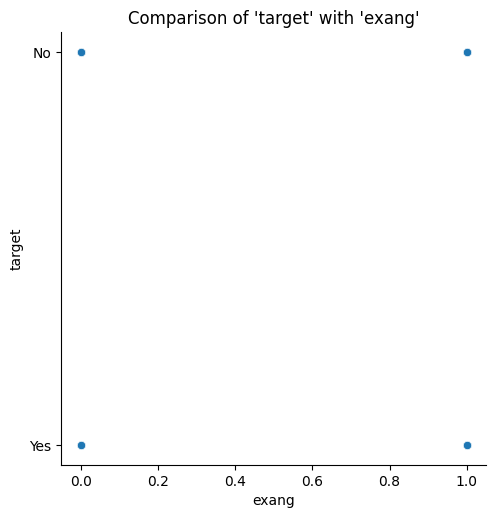

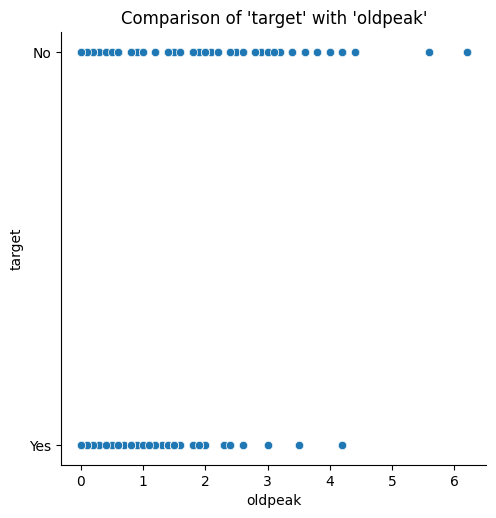

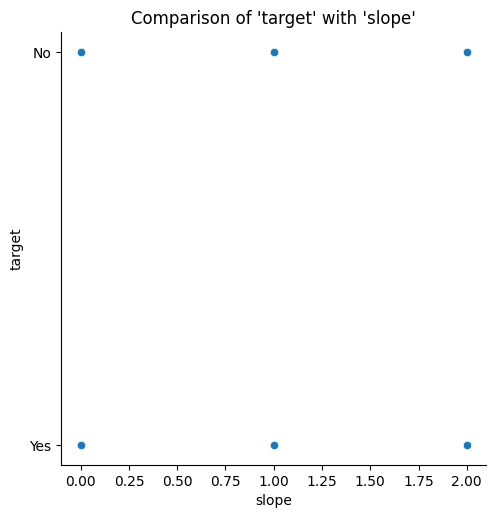

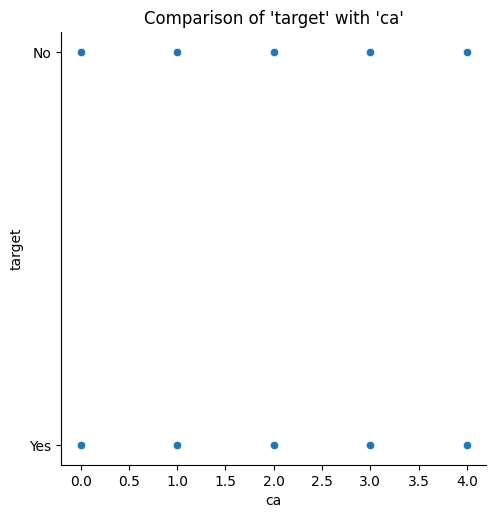

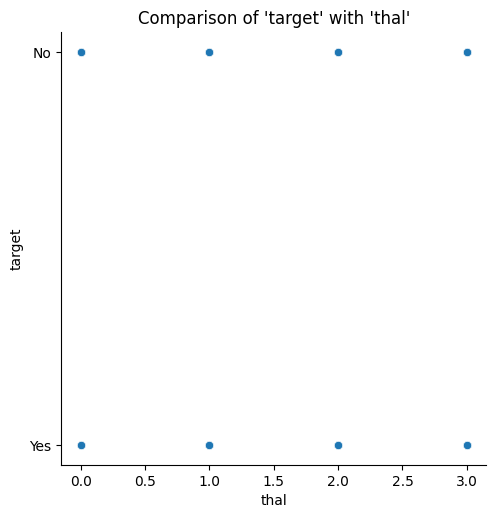

In [ ]:
columns_to_compare = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
for column in columns_to_compare:
    sns.pairplot(df, x_vars=[column], y_vars=['target'], height=5)
    plt.title(f"Comparison of 'target' with '{column}'")
    plt.show()

**ONE HOT ENCODING**

In [ ]:
df = pd.DataFrame(df)

# One-hot encoding for 'sex' column
df_encoded = pd.get_dummies(df, columns=['sex'])

# Convert boolean columns to integers
df_encoded['sex_F'] = df_encoded['sex_F'].astype(int)
df_encoded['sex_M'] = df_encoded['sex_M'].astype(int)

# Display the first few rows of the encoded dataset
print(df_encoded.head())


   age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0   52   0       125   212    0        1      168      0      1.0      2   2   
1   53   0       140   203    1        0      155      1      3.1      0   0   
2   70   0       145   174    0        1      125      1      2.6      0   0   
3   61   0       148   203    0        1      161      0      0.0      2   1   
4   62   0       138   294    1        1      106      0      1.9      1   3   

   thal target  sex_F  sex_M  
0     3     No      0      1  
1     3     No      0      1  
2     3     No      0      1  
3     3     No      0      1  
4     2     No      1      0  


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Separate features and target variable
X_encoded = df_encoded.drop(columns=['target'])
y_encoded = df_encoded['target']

# Initialize the decision tree classifier
clf_encoded = DecisionTreeClassifier(random_state=42)

# Fit the model on the encoded data
clf_encoded.fit(X_encoded, y_encoded)

# Get feature importances
feature_importances_encoded = clf_encoded.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_encoded = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances_encoded})

# Sort the DataFrame by feature importances
feature_importance_df_encoded = feature_importance_df_encoded.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importance with Encoded Categorical Columns:")
print(feature_importance_df_encoded)


Feature Importance with Encoded Categorical Columns:
     Feature  Importance
1         cp    0.279379
10        ca    0.155398
3       chol    0.094733
0        age    0.090098
11      thal    0.080872
8    oldpeak    0.074014
2   trestbps    0.059382
6    thalach    0.044517
9      slope    0.043190
12     sex_F    0.037490
7      exang    0.022201
5    restecg    0.018727
4        fbs    0.000000
13     sex_M    0.000000


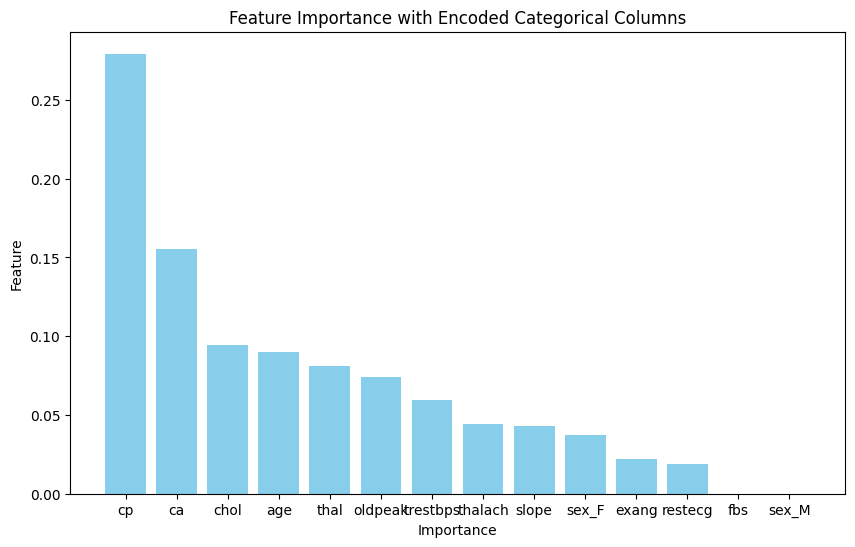

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_encoded['Feature'], feature_importance_df_encoded['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Encoded Categorical Columns')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y_encoded)

# Display encoded target variable
print("Encoded Target Variable:")
print(y_encoded)

Encoded Target Variable:
[0 0 0 ... 0 1 0]


In [ ]:
# Filter features based on importance (0.01)
selected_features = feature_importance_df_encoded[feature_importance_df_encoded['Importance'] > 0.01]['Feature']

# Select input features and output variable
X_selected = X_encoded[selected_features]
y_selected = y_encoded

# Display selected features
print("Selected Features:")
print(selected_features)

# Display the first few rows of X_selected
print("\nFirst few rows of X_selected:")
print(X_selected.head())


Selected Features:
1           cp
10          ca
3         chol
0          age
11        thal
8      oldpeak
2     trestbps
6      thalach
9        slope
12       sex_F
7        exang
5      restecg
Name: Feature, dtype: object

First few rows of X_selected:
   cp  ca  chol  age  thal  oldpeak  trestbps  thalach  slope  sex_F  exang  \
0   0   2   212   52     3      1.0       125      168      2      0      0   
1   0   0   203   53     3      3.1       140      155      0      0      1   
2   0   0   174   70     3      2.6       145      125      0      0      1   
3   0   1   203   61     3      0.0       148      161      2      0      0   
4   0   3   294   62     2      1.9       138      106      1      1      0   

   restecg  
0        1  
1        0  
2        1  
3        1  
4        1  


In [ ]:
X_selected.corr()

,cp,ca,chol,age,thal,oldpeak,trestbps,thalach,slope,sex_F,exang,restecg
cp,1.000000,-0.176206,-0.081641,-0.071966,-0.163341,-0.174733,0.038177,0.306839,0.131633,0.041119,-0.401513,0.043581
ca,-0.176206,1.000000,0.074259,0.271551,0.149014,0.221816,0.104554,-0.207888,-0.073440,-0.111729,0.107849,-0.078072
chol,-0.081641,0.074259,1.000000,0.219823,0.100244,0.064880,0.127977,-0.021772,-0.014248,0.198258,0.067382,-0.147410
age,-0.071966,0.271551,0.219823,1.000000,0.072297,0.208137,0.271121,-0.390227,-0.169105,0.103240,0.088163,-0.132696
thal,-0.163341,0.149014,0.100244,0.072297,1.000000,0.202672,0.059276,-0.098068,-0.094090,-0.198424,0.197201,-0.020504
oldpeak,-0.174733,0.221816,0.064880,0.208137,0.202672,1.000000,0.187434,-0.349796,-0.575189,-0.084687,0.310844,-0.050114
trestbps,0.038177,0.104554,0.127977,0.271121,0.059276,0.187434,1.000000,-0.039264,-0.120445,0.078974,0.061197,-0.123794
thalach,0.306839,-0.207888,-0.021772,-0.390227,-0.098068,-0.349796,-0.039264,1.000000,0.395308,0.049365,-0.380281,0.048411
slope,0.131633,-0.073440,-0.014248,-0.169105,-0.094090,-0.575189,-0.120445,0.395308,1.000000,0.026666,-0.267335,0.086086
sex_F,0.041119,-0.111729,0.198258,0.103240,-0.198424,-0.084687,0.078974,0.049365,0.026666,1.000000,-0.139157,0.055117


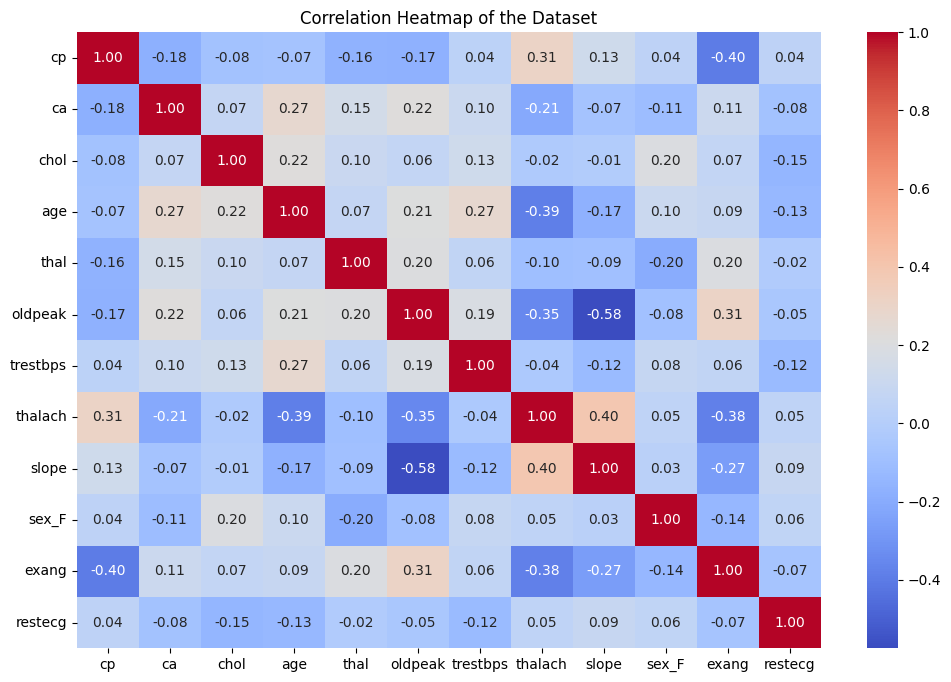

In [ ]:
# Calculate correlation matrix
correlation_matrix = X_selected.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the Dataset')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (820, 12)
Shape of X_test: (205, 12)
Shape of y_train: (820,)
Shape of y_test: (205,)


**SCALING**

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.008275  ,  2.17169136, -1.93503098, ..., -0.65465367,
        -0.72594894, -0.9837419 ],
       [-0.91672034, -0.7254674 ,  1.61063407, ...,  1.52752523,
         1.37750735,  0.9098458 ],
       [ 1.008275  , -0.7254674 ,  0.44217627, ...,  1.52752523,
        -0.72594894, -0.9837419 ],
       ...,
       [-0.91672034, -0.7254674 ,  1.08684264, ..., -0.65465367,
         1.37750735,  0.9098458 ],
       [-0.91672034, -0.7254674 , -0.68598988, ..., -0.65465367,
        -0.72594894,  0.9098458 ],
       [-0.91672034,  0.24025219, -0.30321922, ..., -0.65465367,
        -0.72594894,  0.9098458 ]])

In [ ]:
X_test_scaled

array([[-0.91672034, -0.7254674 , -0.72628153, ...,  1.52752523,
        -0.72594894,  0.9098458 ],
       [ 1.008275  , -0.7254674 , -0.58526076, ...,  1.52752523,
        -0.72594894, -0.9837419 ],
       [-0.91672034,  0.24025219,  0.8853844 , ..., -0.65465367,
         1.37750735, -0.9837419 ],
       ...,
       [ 1.008275  , -0.7254674 , -0.38380252, ..., -0.65465367,
        -0.72594894,  0.9098458 ],
       [-0.91672034,  0.24025219, -0.76657318, ..., -0.65465367,
         1.37750735, -0.9837419 ],
       [ 1.008275  ,  0.24025219, -0.30321922, ..., -0.65465367,
        -0.72594894, -0.9837419 ]])

In [ ]:
np.round(X_train.describe(),1)

,cp,ca,chol,age,thal,oldpeak,trestbps,thalach,slope,sex_F,exang,restecg
count,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0
mean,1.0,0.8,245.1,54.4,2.3,1.0,131.7,149.4,1.4,0.3,0.3,0.5
std,1.0,1.0,49.7,9.2,0.6,1.1,17.6,22.9,0.6,0.5,0.5,0.5
min,0.0,0.0,126.0,29.0,0.0,0.0,94.0,71.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,211.0,47.0,2.0,0.0,120.0,132.0,1.0,0.0,0.0,0.0
50%,1.0,0.0,240.0,56.0,2.0,0.8,130.0,152.0,1.0,0.0,0.0,1.0
75%,2.0,1.0,274.0,61.0,3.0,1.6,140.0,166.2,2.0,1.0,1.0,1.0
max,3.0,4.0,564.0,77.0,3.0,6.2,200.0,202.0,2.0,1.0,1.0,2.0


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [ ]:
np.round(X_train_scaled.describe(), 1)

,0,1,2,3,4,5,6,7,8,9,10,11
count,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0
mean,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.9,-0.7,-2.4,-2.8,-3.9,-0.9,-2.1,-3.4,-2.3,-0.7,-0.7,-1.0
25%,-0.9,-0.7,-0.7,-0.8,-0.5,-0.9,-0.7,-0.8,-0.6,-0.7,-0.7,-1.0
50%,0.0,-0.7,-0.1,0.2,-0.5,-0.2,-0.1,0.1,-0.6,-0.7,-0.7,0.9
75%,1.0,0.2,0.6,0.7,1.1,0.5,0.5,0.7,1.0,1.5,1.4,0.9
max,2.0,3.1,6.4,2.5,1.1,4.5,3.9,2.3,1.0,1.5,1.4,2.8


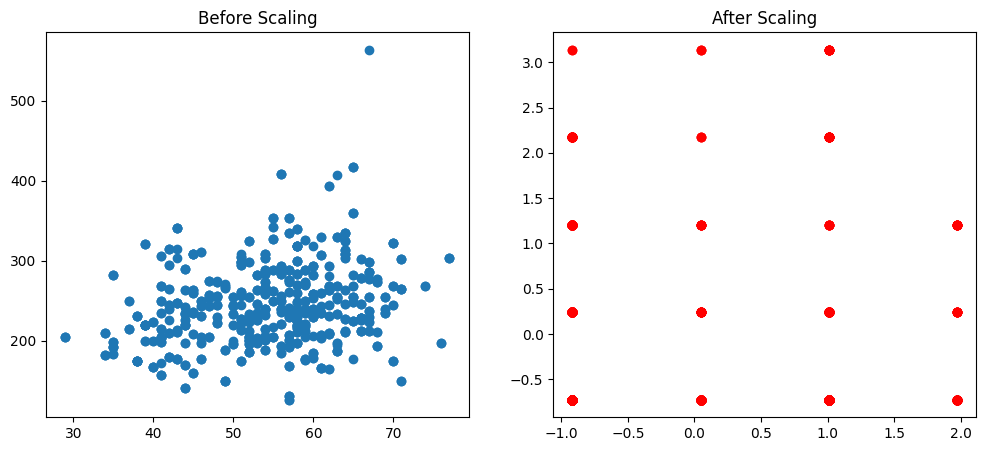

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['age'], X_train['chol'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled[0], X_train_scaled[1], color='red')
ax2.set_title('After Scaling')
plt.show()

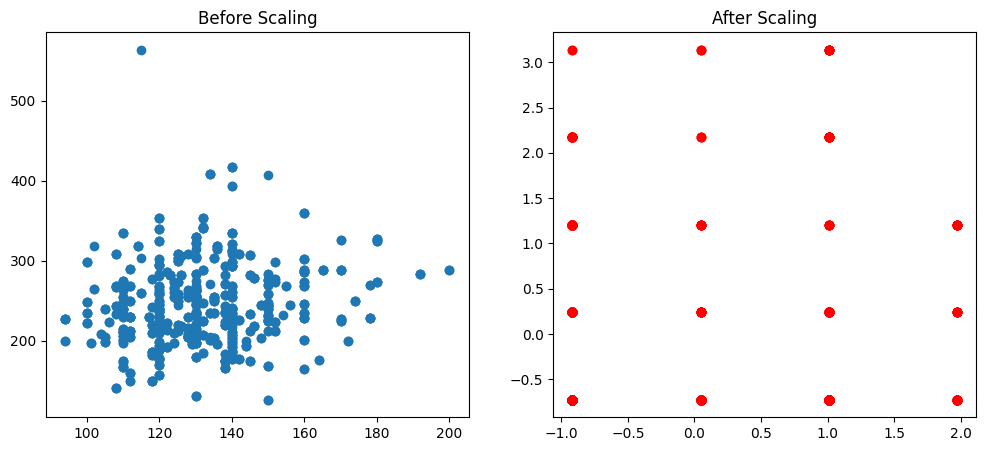

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['trestbps'], X_train['chol'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled[0], X_train_scaled[1], color='red')
ax2.set_title('After Scaling')
plt.show()

**NORMALIZATION**

In [ ]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaling=MinMaxScaler()

In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['cp'] = pd.to_numeric(df['cp'], errors='coerce')
scaling.fit_transform(df[['age','cp']])

array([[0.47916667, 0.        ],
       [0.5       , 0.        ],
       [0.85416667, 0.        ],
       ...,
       [0.375     , 0.        ],
       [0.4375    , 0.        ],
       [0.52083333, 0.        ]])

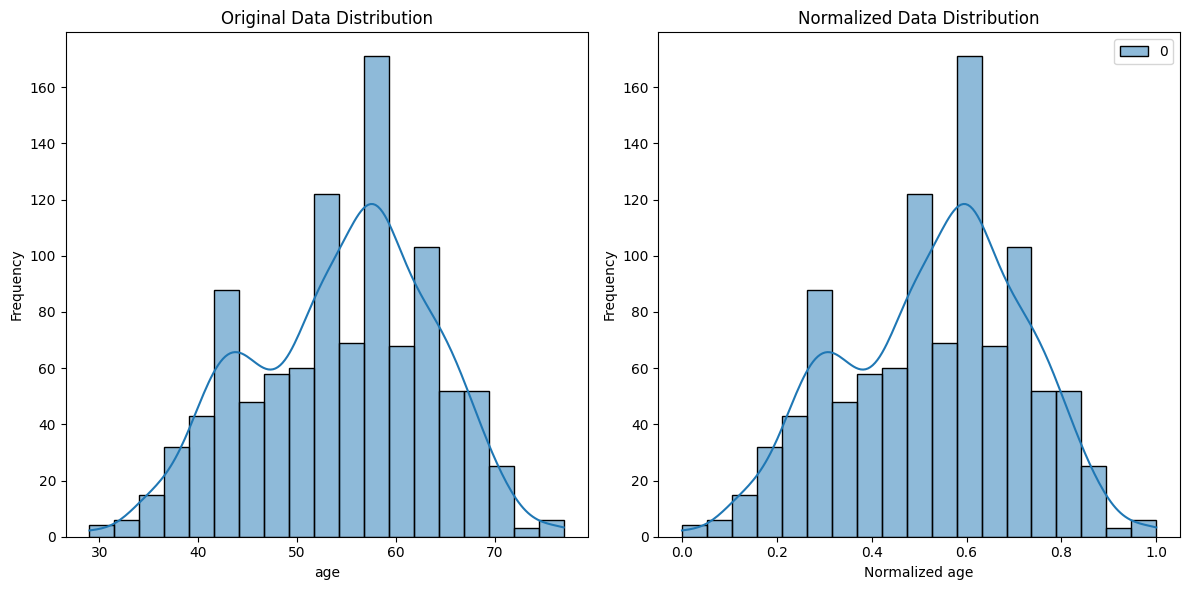

In [ ]:
column_to_normalize = 'age'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df[column_to_normalize], kde=True, ax=axes[0])
axes[0].set_title("Original Data Distribution")
axes[0].set_xlabel(column_to_normalize)
axes[0].set_ylabel("Frequency")

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df[[column_to_normalize]])

sns.histplot(data_normalized, kde=True, ax=axes[1])
axes[1].set_title("Normalized Data Distribution")
axes[1].set_xlabel("Normalized " + column_to_normalize)
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

**STANDARDIZATION**

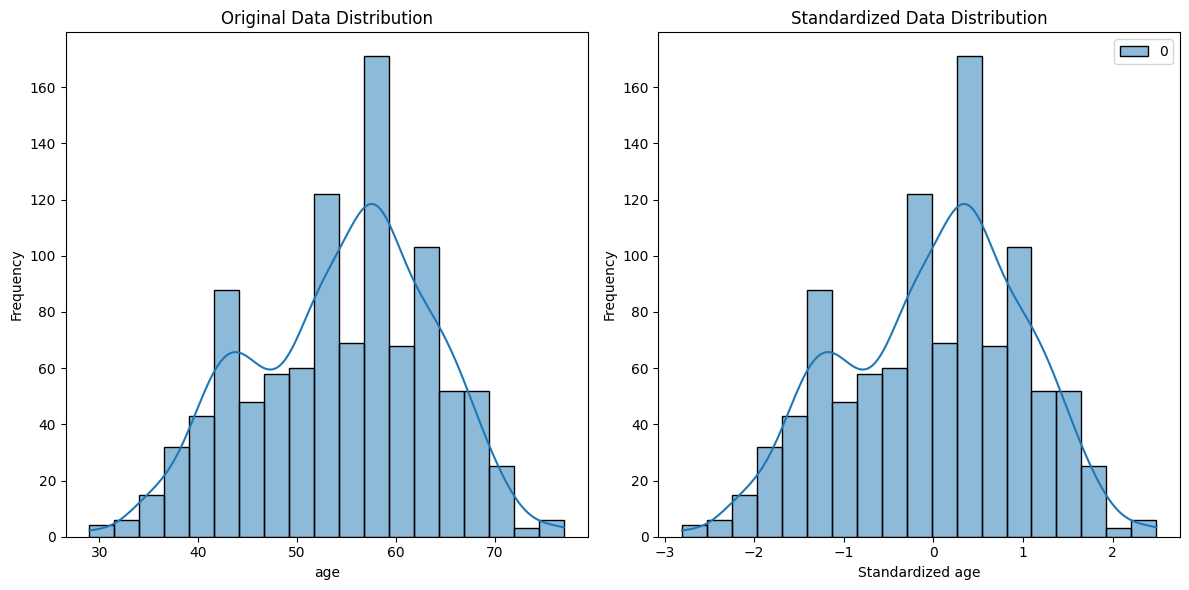

In [ ]:
#Standardization
# Select the column to standardize
column_to_standardize = 'age'

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original data distribution
sns.histplot(df[column_to_standardize], kde=True, ax=axes[0])
axes[0].set_title("Original Data Distribution")
axes[0].set_xlabel(column_to_standardize)
axes[0].set_ylabel("Frequency")

# Initialize the StandardScaler and standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df[[column_to_standardize]])

# Plot the standardized data distribution
sns.histplot(data_standardized, kde=True, ax=axes[1])
axes[1].set_title("Standardized Data Distribution")
axes[1].set_xlabel("Standardized " + column_to_standardize)
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

##ENSEMBLE METHODS

**XGBOOST**

Accuracy of XGBoost Classifier: 98.53658536585365


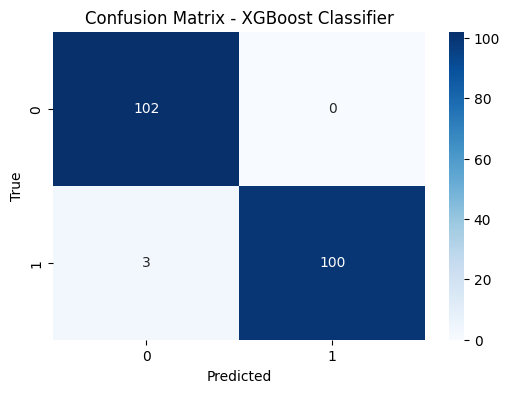

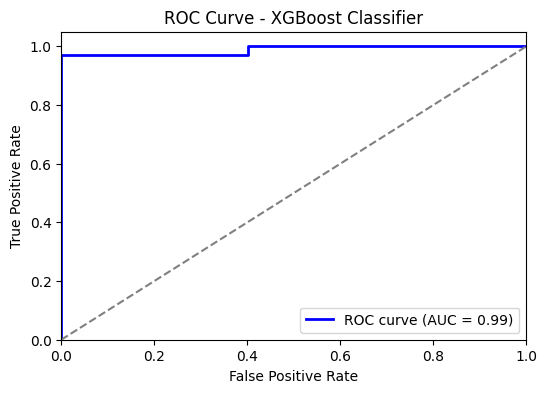

In [ ]:
import xgboost as xgb

# Create and fit the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculating accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
print("Accuracy of XGBoost Classifier:", accuracy_xgb)

# Calculate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

# Calculate predicted probabilities for the positive class
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the XGBClassifier
xgb_clf = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score_xgb = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score_xgb)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Score: 0.9817028065203247


**GRADIENTBOOST**

Accuracy of Gradient Boosting Classifier: 93.17073170731707


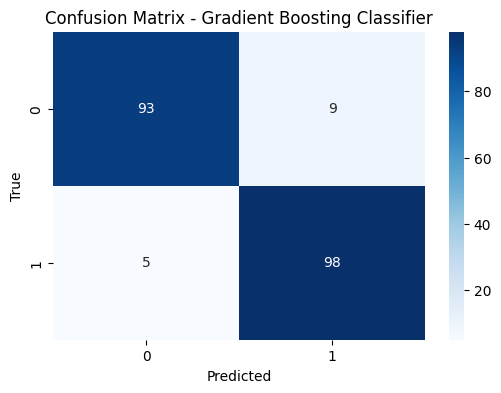

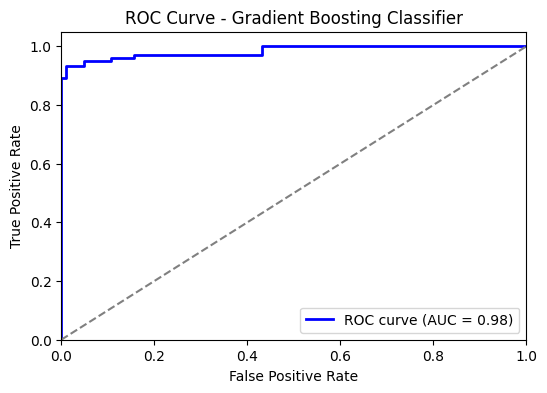

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating and fitting the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Calculating accuracy for GBM
accuracy_gbm = accuracy_score(y_test, y_pred_gbm) * 100
print("Accuracy of Gradient Boosting Classifier:", accuracy_gbm)

# Calculate confusion matrix
cm_gbm = confusion_matrix(y_test, y_pred_gbm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gbm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

# Calculate predicted probabilities for the positive class
y_pred_proba_gbm = gbm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_pred_proba_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_gbm)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score_gbm = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score_gbm)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Score: 0.9792697164959939


**ADABOOST**

Accuracy of AdaBoost Classifier: 87.8048780487805


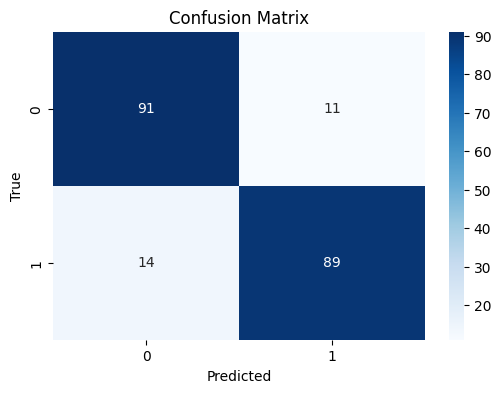

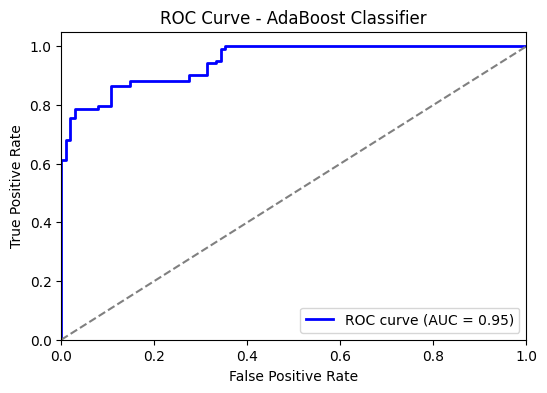

In [ ]:
# Creating and fitting the AdaBoost Classifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = adaboost_model.predict(X_test)
print("===================================================================================")

# Calculating accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred) * 100
print("Accuracy of AdaBoost Classifier:", accuracy_adaboost)
print("===================================================================================")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Obtain predicted probabilities of the positive class
y_pred_proba = adaboost_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create the AdaBoostClassifier
ada_clf = AdaBoostClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score_adaboost = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score_adaboost)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best Score: 0.9438874183399731


**BAGGING**

Accuracy of Bagging Classifier: 98.53658536585365


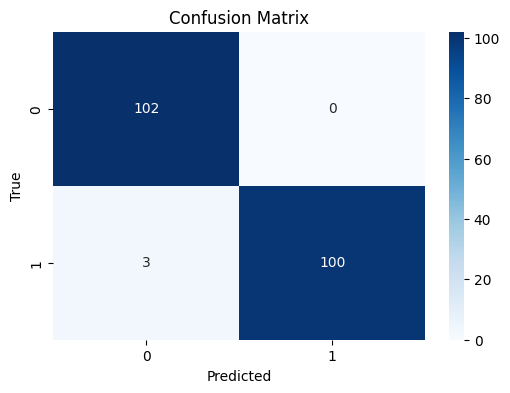

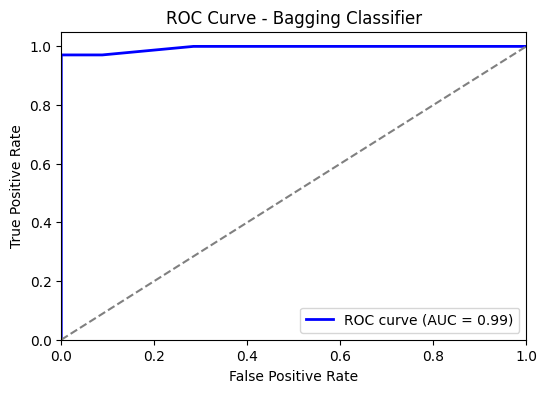

In [ ]:

# Creating and fitting the Bagging Classifier
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = bagging_model.predict(X_test)

print("===================================================================================")

# Calculating accuracy
accuracy_bagging = accuracy_score(y_test, y_pred) * 100
print("Accuracy of Bagging Classifier:", accuracy_bagging)

print("===================================================================================")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Obtain predicted probabilities of the positive class
y_pred_proba = bagging_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging Classifier')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Create the BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score_bagging = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score_bagging)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
Best Score: 0.9829148953236545


##DECISION TREE CLASSIFIER

Accuracy of Decision Tree: 98.53658536585365


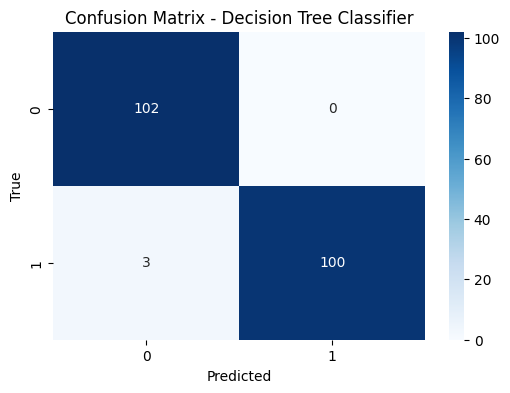

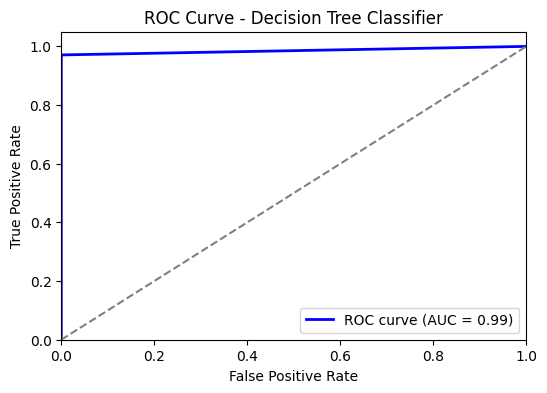

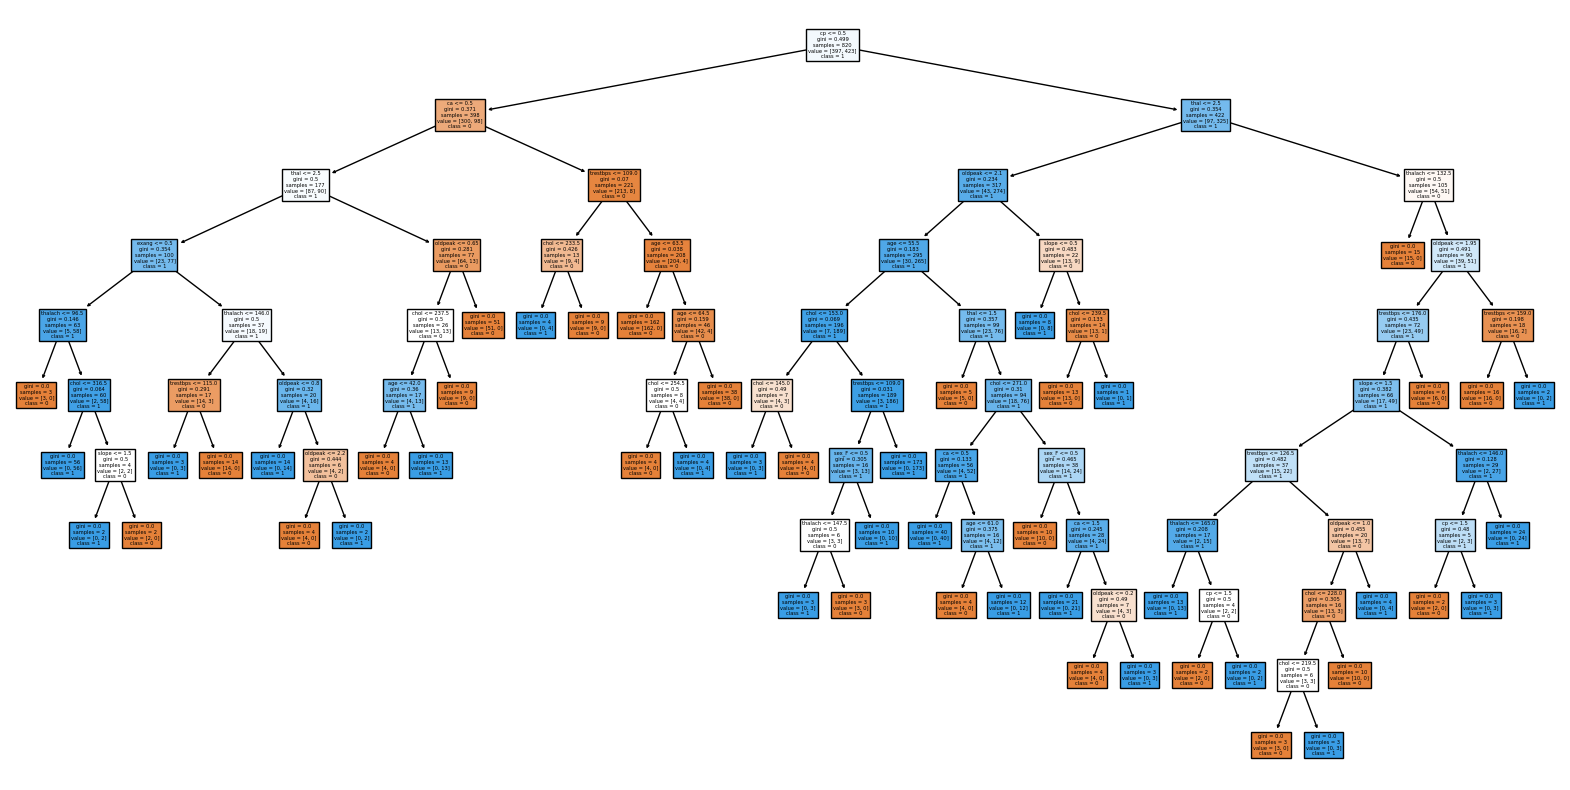

In [ ]:

# Creating and fitting the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculating accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
print("Accuracy of Decision Tree:", accuracy_dt)

# Calculate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

# Calculate predicted probabilities for the positive class
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()



# Create a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 3 folds for each of 270 candidates, totalling 810 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9792830851225012


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score_dt = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score_dt)

# Get the best estimator
best_dt_clf = grid_search.best_estimator_

# Predict on the test data
y_pred = best_dt_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)


Fitting 3 folds for each of 270 candidates, totalling 810 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9768232578451558
Accuracy on test set: 1.0


##RANDOM FOREST CLASSIFIER

Accuracy of Random Forest: 98.53658536585365


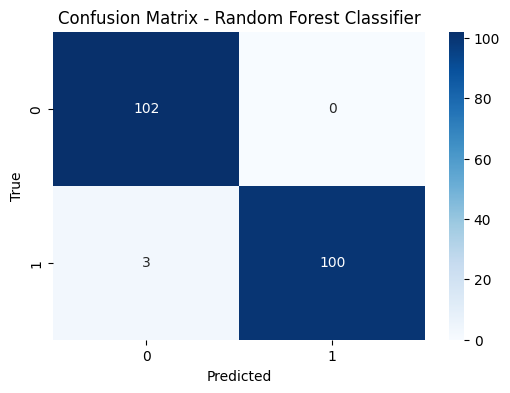

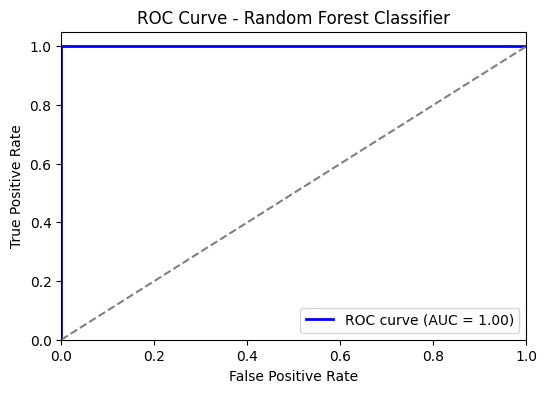

In [ ]:
# Creating and fitting the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculating accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print("Accuracy of Random Forest:", accuracy_rf)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# Calculate predicted probabilities for the positive class
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomForestClassifier
rf_clf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best estimator
best_rf_clf = grid_search.best_estimator_

# Predict on the test data
y_pred = best_rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)


Fitting 3 folds for each of 810 candidates, totalling 2430 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9853479853479854
Accuracy on test set: 0.9853658536585366


##KNN CLASSIFIER

Accuracy of KNN Classifier: 73.17073170731707


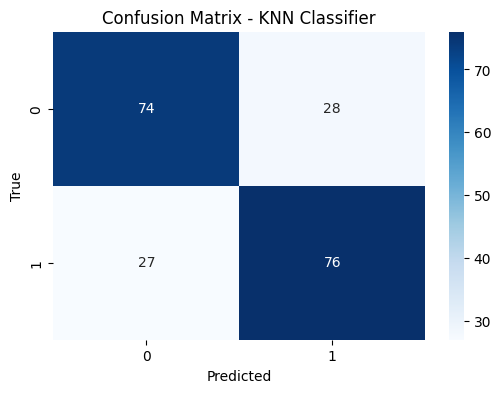

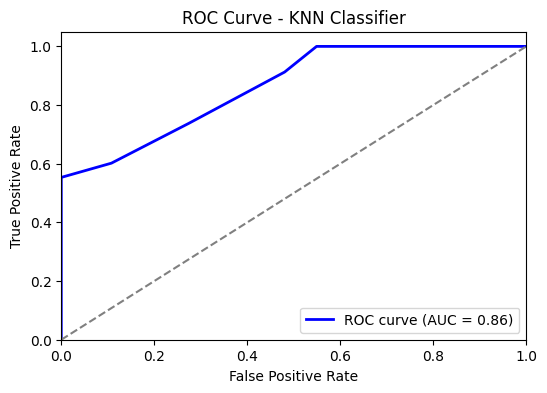

In [ ]:
# Creating and fitting the KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculating accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
print("Accuracy of KNN Classifier:", accuracy_knn)



# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

# Obtain predicted probabilities of the positive class
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score_knn = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score_knn)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.9512000570394731


##SVM CLASSIFIER

Accuracy of SVM: 68.29268292682927


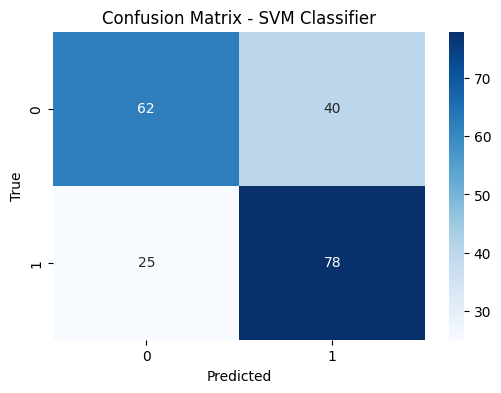

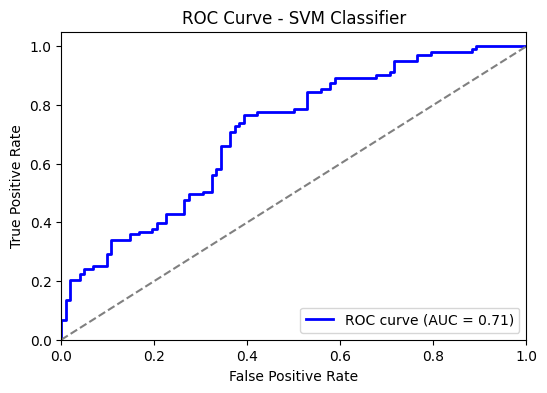

In [ ]:
# Creating and fitting the SVM Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculating accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
print("Accuracy of SVM:", accuracy_svm)



# Calculate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

# Obtain predicted probabilities of the positive class
y_pred_proba_svm = svm_model.decision_function(X_test)

# Compute ROC curve and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameters grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Create the SVC classifier
svc_clf = SVC()

# Create the GridSearchCV object for SVM
grid_search_svm = GridSearchCV(estimator=svc_clf, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best score for SVM
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters for SVM:", best_params_svm)
print("Best Score for SVM:", best_score_svm)



Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters for SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score for SVM: 0.9402600643476555


In [ ]:
# Calculate accuracies for all models
accuracies = {
    'Model': ['Random Forest', 'SVM', 'Decision Tree', 'KNN', 'Bagging', 'AdaBoost', 'XGBoost','GBM'],
    'Accuracy': [accuracy_rf, accuracy_svm, accuracy_dt, accuracy_knn, accuracy_bagging, accuracy_adaboost, accuracy_xgb, accuracy_gbm]
}

# Print table
print(tabulate(accuracies, headers='keys', tablefmt='grid'))



+---------------+------------+
| Model         |   Accuracy |
+===============+============+
| Random Forest |    98.5366 |
+---------------+------------+
| SVM           |    68.2927 |
+---------------+------------+
| Decision Tree |    98.5366 |
+---------------+------------+
| KNN           |    73.1707 |
+---------------+------------+
| Bagging       |    98.5366 |
+---------------+------------+
| AdaBoost      |    87.8049 |
+---------------+------------+
| XGBoost       |    98.5366 |
+---------------+------------+
| GBM           |    93.1707 |
+---------------+------------+


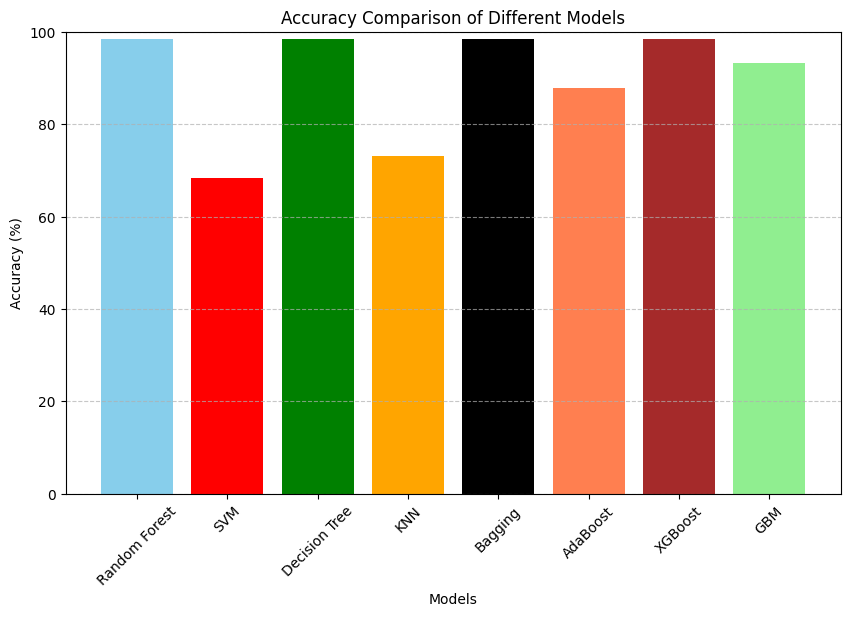

In [ ]:
# Models and their accuracies
models = ['Random Forest', 'SVM', 'Decision Tree', 'KNN', 'Bagging', 'AdaBoost','XGBoost','GBM']
accuracies = [accuracy_rf, accuracy_svm, accuracy_dt, accuracy_knn, accuracy_bagging, accuracy_adaboost,accuracy_xgb,accuracy_gbm]
colors = ['skyblue', 'red', 'green', 'orange', 'black', 'coral','brown','lightgreen']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 100)  # Set y-axis limit between 0 and 100
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Function to calculate time complexity
def calculate_time_complexity(model, X_train, y_train, X_test):
    # Training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Prediction time
    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    prediction_time = end_time - start_time

    return training_time, prediction_time

# Dictionary to store time complexities
time_complexities = {}

# Calculate time complexities for each model
models = {
    'SVM': SVC(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'GBM': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    training_time, prediction_time = calculate_time_complexity(model, X_train, y_train, X_test)
    time_complexities[name] = (training_time, prediction_time)
from tabulate import tabulate

# list to store time complexities
time_complexity_table = []

# Calculate time complexities for each model
for name, model in models.items():
    training_time, prediction_time = calculate_time_complexity(model, X_train, y_train, X_test)
    time_complexity_table.append([name, training_time, prediction_time])

# Print time complexities
print(tabulate(time_complexity_table, headers=["Model", "Training Time (s)", "Prediction Time (s)"], tablefmt="grid"))


+---------------+---------------------+-----------------------+
| Model         |   Training Time (s) |   Prediction Time (s) |
+===============+=====================+=======================+
| SVM           |           0.0851731 |            0.0440009  |
+---------------+---------------------+-----------------------+
| Bagging       |           0.117252  |            0.0126288  |
+---------------+---------------------+-----------------------+
| AdaBoost      |           0.180475  |            0.0342858  |
+---------------+---------------------+-----------------------+
| Random Forest |           0.48986   |            0.0415099  |
+---------------+---------------------+-----------------------+
| Decision Tree |           0.015363  |            0.0032146  |
+---------------+---------------------+-----------------------+
| XGBoost       |           0.175512  |            0.00444961 |
+---------------+---------------------+-----------------------+
| GBM           |           0.268982  | 